<a href="https://colab.research.google.com/github/RaquelFonsec/Pipeline-ETL/blob/main/Pipeline_ETL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Carregar os arquivos CSV no Pandas
df_clientes = pd.read_csv("clientes.csv")
df_pedidos = pd.read_csv("pedidos.csv")
df_pagamentos = pd.read_csv("pagamentos.csv")

# Visualizar os primeiros registros de cada DataFrame
print(df_clientes.head())
print(df_pedidos.head())
print(df_pagamentos.head())


   cliente_id               nome                       email data_nascimento  \
0           1  Ana Sophia Araújo         levicunha@ig.com.br      1961-03-08   
1           2        Sarah Viana             bazevedo@da.com      1992-05-26   
2           3         Theo Viana  ana-liviafreitas@gmail.com      2005-11-05   
3           4     Samuel Pereira        henrique35@gmail.com      1960-07-09   
4           5   Ana Luiza Moraes           bryan78@gmail.com      1979-12-20   

      genero estado  
0  Masculino     BA  
1  Masculino     RJ  
2      Outro     RJ  
3  Masculino     SP  
4  Masculino     CE  
   pedido_id  cliente_id data_pedido  valor_total            status
0          1          31  2024-01-07       302.33        Finalizado
1          2          86  2023-11-18       663.23         Cancelado
2          3          41  2024-07-16       932.57        Finalizado
3          4           2  2024-09-26       485.37  Em Processamento
4          5          13  2025-02-04       119.

In [ ]:
import os
print(os.listdir("/content/"))


['.config', 'pagamentos.csv', 'pedidos.csv', 'clientes.csv', 'clientes - clientes.csv (1).csv', 'sample_data']


In [ ]:
# Tratar e-mails faltantes ou inválidos
df_clientes['email'] = df_clientes['email'].str.strip()  # Remover espaços extras
df_clientes = df_clientes[df_clientes['email'].notna()]  # Remover clientes sem e-mail

# Validar e-mails (exemplo simples: verificar se contém '@')
df_clientes = df_clientes[df_clientes['email'].str.contains('@')]

# Converter datas para o formato adequado
df_clientes['data_nascimento'] = pd.to_datetime(df_clientes['data_nascimento'], errors='coerce')
df_pedidos['data_pedido'] = pd.to_datetime(df_pedidos['data_pedido'], errors='coerce')
df_pagamentos['data_pagamento'] = pd.to_datetime(df_pagamentos['data_pagamento'], errors='coerce')

# Remover registros de pagamentos com valor zero ou negativo
df_pagamentos = df_pagamentos[df_pagamentos['valor_pago'] > 0]

# Remover pedidos sem cliente correspondente
df_pedidos = df_pedidos[df_pedidos['cliente_id'].isin(df_clientes['cliente_id'])]

# Verificar se houve algum dado perdido após o tratamento
print(df_clientes.isnull().sum())  # Verificar nulos
print(df_pedidos.isnull().sum())   # Verificar nulos
print(df_pagamentos.isnull().sum()) # Verificar nulos


cliente_id         0
nome               0
email              0
data_nascimento    0
genero             0
estado             0
dtype: int64
pedido_id      0
cliente_id     0
data_pedido    0
valor_total    0
status         0
dtype: int64
pagamento_id        0
pedido_id           0
metodo_pagamento    0
valor_pago          0
data_pagamento      0
dtype: int64


In [ ]:
# Merge entre os DataFrames
df_unificado = pd.merge(df_clientes, df_pedidos, on='cliente_id', how='inner')
df_unificado = pd.merge(df_unificado, df_pagamentos, on='pedido_id', how='inner')

# Exibir as primeiras linhas do DataFrame unificado
print(df_unificado.head())


   cliente_id               nome                       email data_nascimento  \
0           1  Ana Sophia Araújo         levicunha@ig.com.br      1961-03-08   
1           2        Sarah Viana             bazevedo@da.com      1992-05-26   
2           2        Sarah Viana             bazevedo@da.com      1992-05-26   
3           2        Sarah Viana             bazevedo@da.com      1992-05-26   
4           3         Theo Viana  ana-liviafreitas@gmail.com      2005-11-05   

      genero estado  pedido_id data_pedido  valor_total            status  \
0  Masculino     BA         61  2024-06-12       338.68        Finalizado   
1  Masculino     RJ          4  2024-09-26       485.37  Em Processamento   
2  Masculino     RJ        133  2024-07-12       857.10         Cancelado   
3  Masculino     RJ        149  2023-11-12       540.80        Finalizado   
4      Outro     RJ        114  2024-10-16       761.57        Finalizado   

   pagamento_id   metodo_pagamento  valor_pago data_paga

In [ ]:
from datetime import datetime

df_unificado['idade'] = (datetime.now() - df_unificado['data_nascimento']).dt.days // 365.25


# 2. Criação da coluna "pedido_pago" (True ou False)
df_unificado['pedido_pago'] = df_unificado['valor_pago'] >= df_unificado['valor_total']

# 3. Padronização de colunas de texto
df_unificado['nome'] = df_unificado['nome'].str.strip().str.lower()
df_unificado['email'] = df_unificado['email'].str.strip().str.lower()
df_unificado['estado'] = df_unificado['estado'].str.strip().str.upper()  # Sigla do estado em maiúsculas
print(df_unificado[['cliente_id', 'idade']].head())
# Exibir o DataFrame final após transformações
print(df_unificado.head())


   cliente_id  idade
0           1   64.0
1           2   32.0
2           2   32.0
3           2   32.0
4           3   19.0
   cliente_id               nome                       email data_nascimento  \
0           1  ana sophia araújo         levicunha@ig.com.br      1961-03-08   
1           2        sarah viana             bazevedo@da.com      1992-05-26   
2           2        sarah viana             bazevedo@da.com      1992-05-26   
3           2        sarah viana             bazevedo@da.com      1992-05-26   
4           3         theo viana  ana-liviafreitas@gmail.com      2005-11-05   

      genero estado  pedido_id data_pedido  valor_total            status  \
0  Masculino     BA         61  2024-06-12       338.68        Finalizado   
1  Masculino     RJ          4  2024-09-26       485.37  Em Processamento   
2  Masculino     RJ        133  2024-07-12       857.10         Cancelado   
3  Masculino     RJ        149  2023-11-12       540.80        Finalizado   
4      O

In [ ]:
from pandas_gbq import to_gbq
from google.cloud import exceptions


project_id = 'cellular-bebop-394811'
dataset_id = 'clientes'
table_name = 'clientes'

try:
    # Enviar o DataFrame para o BigQuery
    to_gbq(df_unificado, f'{dataset_id}.{table_name}', project_id=project_id, if_exists='replace')
    print(f'Dados enviados com sucesso para {project_id}.{dataset_id}.{table_name}')
except exceptions.GoogleCloudError as e:
    print(f'Ocorreu um erro ao tentar enviar os dados para o BigQuery: {e}')


100%|██████████| 1/1 [00:00<00:00, 2069.22it/s]

Dados enviados com sucesso para cellular-bebop-394811.clientes.clientes


Resumo das Transformações Realizadas:


Tratamento de Dados Faltantes ou Inválidos:

E-mails inválidos ou faltantes foram corrigidos, e registros com dados inconsistentes, como valores de pagamentos negativos ou zero, foram removidos.
Formatação de Datas: A coluna de datas foi convertida para o formato adequado, garantindo a consistência dos dados.


Unificação das Tabelas: As três bases de dados (clientes, pedidos e pagamentos) foram unificadas utilizando operações de merge no Pandas, criando uma única tabela consolidada com as colunas necessárias.


Criação da Coluna "Idade": A idade foi calculada com base na data de nascimento, utilizando a diferença entre a data atual e a data de nascimento do cliente.


Criação da Coluna "Pedido Pago": Foi criada uma nova coluna indicando se o valor pago foi igual ou maior que o valor total do pedido (booleano).
Padronização de Texto: As colunas de texto, como "nome", "email" e "estado", foram padronizadas para minúsculas e maiúsculas onde necessário, e espaços extras foram removidos.


Carregamento no BigQuery: A tabela final foi carregada no Google BigQuery, utilizando a biblioteca pandas-gbq, para centralizar e armazenar os dados no Data Warehouse.

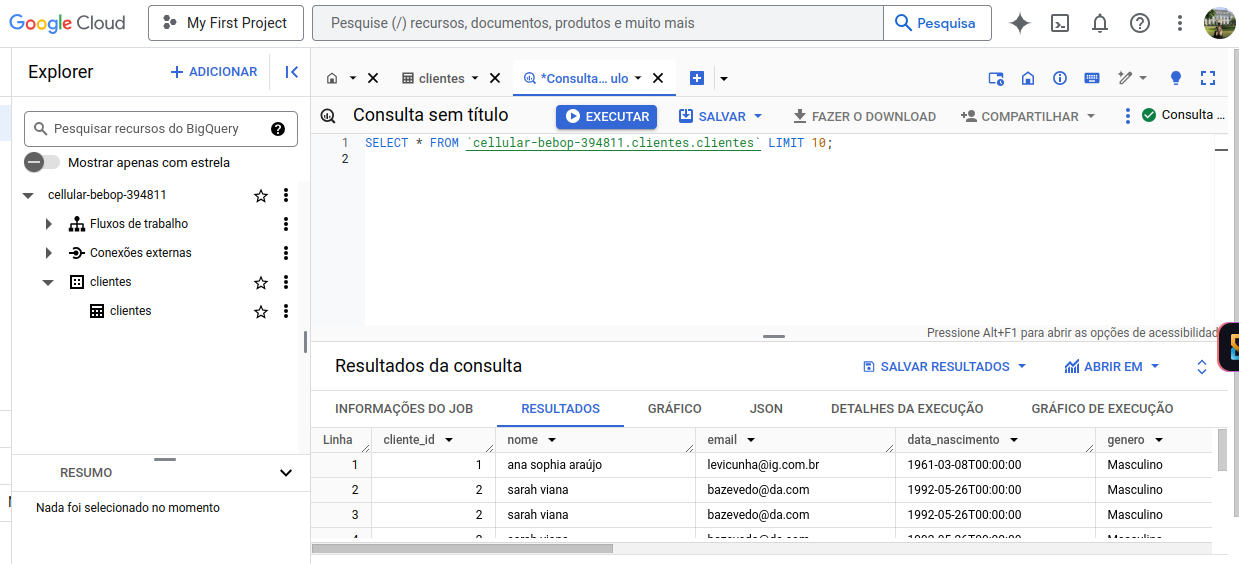